In [33]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.utils import resample

In [34]:
files = ['Normal', 'COVID']
path = "C://Users/Admin/Downloads/archive (4)/COVID-19_Radiography_Dataset"

data_dir = os.path.join(path)

data = []
for id, level in enumerate(files):
    for file in os.listdir(os.path.join(data_dir, level+'/'+'images')):

        data.append([level +'/' +'images'+ '/'+file, level])
        

data = pd.DataFrame(data, columns = ['image_file', 'corona_result'])

data['path'] = path + '/' +data['image_file']
data['corona_result'] = data['corona_result'].map({'Normal': 'Negative', 'COVID': 'Positive'})

data.head()

,image_file,corona_result,path
0,Normal/images/Normal-1.png,Negative,C://Users/Admin/Downloads/archive (4)/COVID-19...
1,Normal/images/Normal-10.png,Negative,C://Users/Admin/Downloads/archive (4)/COVID-19...
2,Normal/images/Normal-100.png,Negative,C://Users/Admin/Downloads/archive (4)/COVID-19...
3,Normal/images/Normal-1000.png,Negative,C://Users/Admin/Downloads/archive (4)/COVID-19...
4,Normal/images/Normal-10000.png,Negative,C://Users/Admin/Downloads/archive (4)/COVID-19...


In [35]:
data.tail()

,image_file,corona_result,path
13803,COVID/images/COVID-995.png,Positive,C://Users/Admin/Downloads/archive (4)/COVID-19...
13804,COVID/images/COVID-996.png,Positive,C://Users/Admin/Downloads/archive (4)/COVID-19...
13805,COVID/images/COVID-997.png,Positive,C://Users/Admin/Downloads/archive (4)/COVID-19...
13806,COVID/images/COVID-998.png,Positive,C://Users/Admin/Downloads/archive (4)/COVID-19...
13807,COVID/images/COVID-999.png,Positive,C://Users/Admin/Downloads/archive (4)/COVID-19...


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13808 entries, 0 to 13807
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   image_file     13808 non-null  object
 1   corona_result  13808 non-null  object
 2   path           13808 non-null  object
dtypes: object(3)
memory usage: 323.8+ KB


In [48]:
import matplotlib.cm as cm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame()
df['corona_result'] = ['Positive', 'Negative']
df['Count'] = [len(data[data['corona_result'] == 'Positive']), len(data[data['corona_result'] == 'Negative'])]
df = df.sort_values(by = ['Count'], ascending = False)

fig = px.bar(df, x = 'corona_result', y = 'Count', 
             color = "corona_result", text_auto='', width = 600, 
             color_discrete_sequence = ["teal", "purple"],
             template = 'plotly_dark')

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)

fig.show()

In [33]:
import cv2
all_data = []

for i in range(len(data)):
    image = cv2.imread(data['path'][i])
    image = cv2.resize(image, (70, 70)) / 255.0
    label = 1 if data['corona_result'][i] == "Positive" else 0
    all_data.append([image, label])

In [333]:
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow.keras import layers, models
x = []
y = []

for image, label in all_data:
    x.append(image)
    y.append(label)

    
x = np.array(x)
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)


print(x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape)


(9941, 70, 70, 3) (2762, 70, 70, 3) (1105, 70, 70, 3) (9941,) (2762,) (1105,)


In [37]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

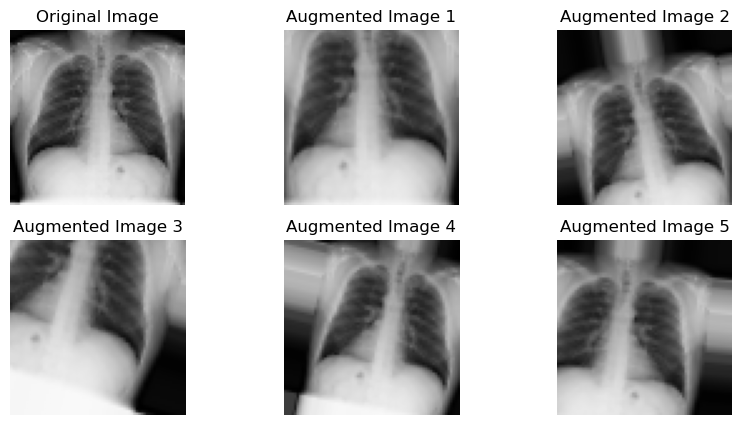

In [48]:
from tensorflow.keras.preprocessing.image import img_to_array

img_array = img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)  

augmented_images = datagen.flow(img_array, batch_size=1)

plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

for i in range(2, 7):
    augmented_image = augmented_images.next()[0]
    plt.subplot(2, 3, i)
    plt.imshow(augmented_image)
    plt.title(f'Augmented Image {i-1}')
    plt.axis('off')

plt.show()


In [38]:

batch_size = 32
augmented_train_data = datagen.flow(x_train, y_train, batch_size=batch_size)

# CNN_DA_Model

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.regularizers import l2

model = models.Sequential()
weight_decay = 0.0001


model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(weight_decay), 
                 input_shape=(70, 70, 3)))
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))


model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',kernel_initializer='he_uniform', kernel_regularizer=l2(weight_decay)))   
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',kernel_initializer='he_uniform', kernel_regularizer=l2(weight_decay)))   
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))


model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu',kernel_initializer='he_uniform', kernel_regularizer=l2(weight_decay))) 
model.add(BatchNormalization())



model.add(Flatten())
model.add(layers.Dense(units = 8, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(Dense(2, activation='softmax'))

In [84]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 70, 70, 32)        896       
                                                                 
 batch_normalization_8 (Bat  (None, 70, 70, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 35, 35, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 35, 35, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 35, 35, 64)        18496     
                                                                 
 batch_normalization_9 (Bat  (None, 35, 35, 64)       

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

epochs = 200

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=0.000001)

early_stopping = EarlyStopping(monitor='val_loss', patience=9, restore_best_weights=True)


CNN_DA_Model = model.fit(augmented_train_data,
          epochs=epochs,
          validation_data=(x_val, y_val),
          callbacks=[reduce_lr, early_stopping])

Epoch 1/200
311/311 [==============================] - 71s 222ms/step - loss: 0.6294 - accuracy: 0.7169 - val_loss: 1.2958 - val_accuracy: 0.2516 - lr: 1.0000e-04
Epoch 2/200
311/311 [==============================] - 70s 225ms/step - loss: 0.5595 - accuracy: 0.7474 - val_loss: 0.5182 - val_accuracy: 0.7738 - lr: 1.0000e-04
Epoch 3/200
311/311 [==============================] - 73s 235ms/step - loss: 0.5285 - accuracy: 0.7593 - val_loss: 0.4497 - val_accuracy: 0.8127 - lr: 1.0000e-04
Epoch 4/200
311/311 [==============================] - 75s 242ms/step - loss: 0.5144 - accuracy: 0.7665 - val_loss: 0.4228 - val_accuracy: 0.8172 - lr: 1.0000e-04
Epoch 5/200
311/311 [==============================] - 72s 232ms/step - loss: 0.5077 - accuracy: 0.7692 - val_loss: 0.4104 - val_accuracy: 0.8344 - lr: 1.0000e-04
Epoch 6/200
311/311 [==============================] - 73s 233ms/step - loss: 0.4819 - accuracy: 0.7829 - val_loss: 0.4027 - val_accuracy: 0.8045 - lr: 1.0000e-04
Epoch 7/200
311/311 [=

<Axes: >

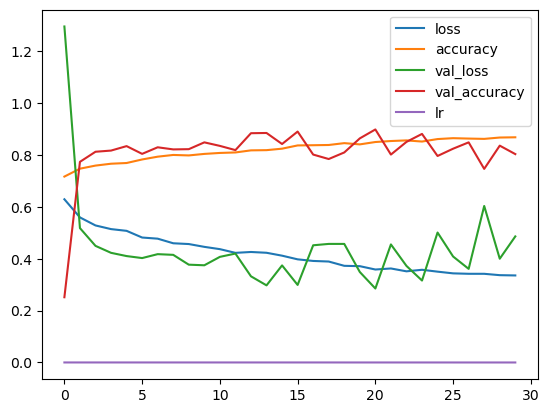

In [86]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [87]:
yp_train = model.predict(x_train)
yp_train = np.argmax(yp_train, axis = 1)

yp_val = model.predict(x_val)
yp_val = np.argmax(yp_val, axis = 1)

yp_test = model.predict(x_test)
yp_test = np.argmax(yp_test, axis = 1)

87/87 [==============================] - 4s 42ms/step


In [88]:
def evaluation_parametrics(name, y_train, yp_train, y_val, yp_val, y_test, yp_test):
    
    print("\n-----------------------------{}-----------------------------\n".format(name))
    
    cm_train = confusion_matrix(y_train, yp_train)
    t1 = ConfusionMatrixDisplay(cm_train)
    s1 = round((cm_train[0,0]/(cm_train[0,0] + cm_train[0,1])),4)
    
    print("Classification Report for Train Data\n")
    print(classification_report(y_train, yp_train)) 
    print("--------------------------------------------------------------------------")
    print("Recall on Train Data: ", round(recall_score(y_train, yp_train),4))
    print("Specificity on Train Data: ", s1)
    print("Accuracy on Train Data: ", round(accuracy_score(y_train, yp_train),4))
    print("Precision on Train Data: ", round(precision_score(y_train, yp_train),4))
    print("F1 Score on Train Data: ", round(f1_score(y_train, yp_train),4))
    print("--------------------------------------------------------------------------")
       
    cm_val = confusion_matrix(y_val, yp_val)
    t2 = ConfusionMatrixDisplay(cm_val)
    s2 = round((cm_val[0,0]/(cm_val[0,0] + cm_val[0,1])),4)
    
    print("\nClassification Report for Validation Data\n")
    print(classification_report(y_val, yp_val))   
    print("--------------------------------------------------------------------------")
    print("Recall on Val Data: ", round(recall_score(y_val, yp_val),4))
    print("Specificity on Val Data: ", s2)
    print("Accuracy on Val Data: ", round(accuracy_score(y_val, yp_val),4))
    print("Precision on Val Data: ", round(precision_score(y_val, yp_val),4))
    print("F1 Score on Val Data: ", round(f1_score(y_val, yp_val),4))
    print("--------------------------------------------------------------------------")

    cm_test = confusion_matrix(y_test, yp_test)
    t3 = ConfusionMatrixDisplay(cm_test)
    s3 = round((cm_test[0,0]/(cm_test[0,0] + cm_test[0,1])),4)
    
    print("\nClassification Report for Test Data\n")
    print(classification_report(y_test, yp_test))   
    print("--------------------------------------------------------------------------")
    print("Recall on Test Data: ", round(recall_score(y_test, yp_test), 4))
    print("Specificity on Test Data: ", s3)
    print("Accuracy on Test Data: ", round(accuracy_score(y_test, yp_test), 4))
    print("Precision on Test Data: ", round(precision_score(y_test, yp_test), 4))
    print("F1 Score Test Data: ", round(f1_score(y_test, yp_test), 4))
    print("--------------------------------------------------------------------------")
    
    t1.plot()
    t2.plot()   
    t3.plot()


-----------------------------Covid-19 CNN-----------------------------

Classification Report for Train Data

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      7287
           1       0.77      0.87      0.81      2654

    accuracy                           0.89      9941
   macro avg       0.86      0.88      0.87      9941
weighted avg       0.90      0.89      0.90      9941

--------------------------------------------------------------------------
Recall on Train Data:  0.8659
Specificity on Train Data:  0.9033
Accuracy on Train Data:  0.8933
Precision on Train Data:  0.7652
F1 Score on Train Data:  0.8124
--------------------------------------------------------------------------

Classification Report for Validation Data

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       844
           1       0.75      0.87      0.80       261

    accuracy                           0.9

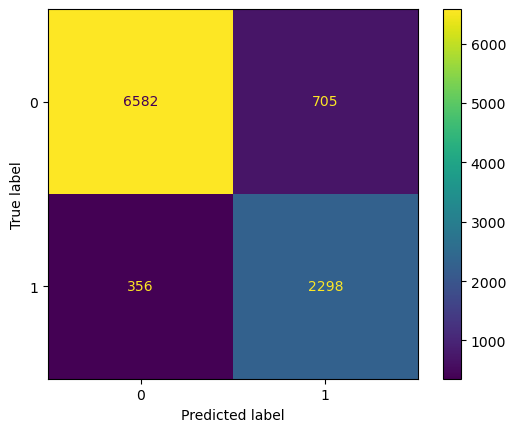

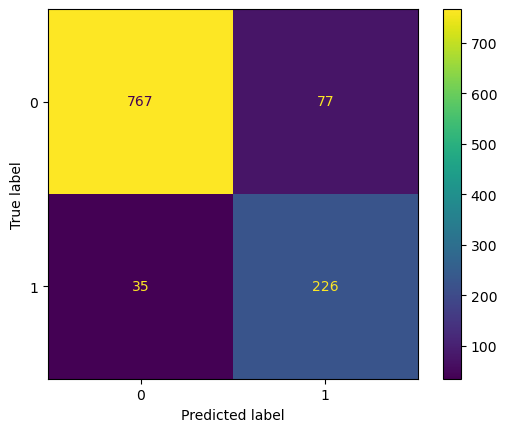

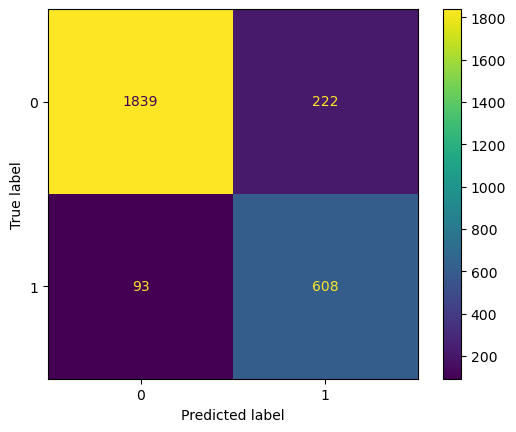

In [89]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score
evaluation_parametrics("Covid-19 CNN", y_train, yp_train, y_val, yp_val, y_test, yp_test)

# VGG16_DA_Model

In [39]:
from keras.applications.vgg16 import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(70, 70, 3))

for layer in base_model.layers:
    layer.trainable = False

In [40]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 70, 70, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 70, 70, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 70, 70, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 35, 35, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 35, 35, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 35, 35, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 17, 17, 128)       0     

In [41]:
train_from_layer = base_model.get_layer('block5_conv1')  
for layer in base_model.layers:
    if layer == train_from_layer:
        layer.trainable = True
    else:
        layer.trainable = False

In [43]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.regularizers import l2

weight_decay = 0.0001
model = tf.keras.Sequential([
    base_model, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(weight_decay)),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(2, activation='softmax')
])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense (Dense)               (None, 8)                 4104      
                                                                 
 batch_normalization (Batch  (None, 8)                 32        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 8)                 0

In [45]:

batch_size = 32

epochs = 200

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=0.000001)

early_stopping = EarlyStopping(monitor='val_loss', patience=9, restore_best_weights=True)

VGG16 = model.fit(augmented_train_data,
          epochs=epochs,
          validation_data=(x_val, y_val),
          callbacks=[reduce_lr, early_stopping])

Epoch 1/200
311/311 [==============================] - 152s 483ms/step - loss: 0.5437 - accuracy: 0.7925 - val_loss: 0.3818 - val_accuracy: 0.8751 - lr: 1.0000e-04
Epoch 2/200
311/311 [==============================] - 153s 492ms/step - loss: 0.4409 - accuracy: 0.8679 - val_loss: 0.3364 - val_accuracy: 0.9285 - lr: 1.0000e-04
Epoch 3/200
311/311 [==============================] - 155s 497ms/step - loss: 0.3711 - accuracy: 0.8833 - val_loss: 0.3034 - val_accuracy: 0.8860 - lr: 1.0000e-04
Epoch 4/200
311/311 [==============================] - 157s 505ms/step - loss: 0.3279 - accuracy: 0.8812 - val_loss: 0.2255 - val_accuracy: 0.9059 - lr: 1.0000e-04
Epoch 5/200
311/311 [==============================] - 157s 503ms/step - loss: 0.2885 - accuracy: 0.8937 - val_loss: 0.2262 - val_accuracy: 0.9339 - lr: 1.0000e-04
Epoch 6/200
311/311 [==============================] - 157s 503ms/step - loss: 0.2680 - accuracy: 0.9026 - val_loss: 0.2893 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 7/200
311/

<Axes: >

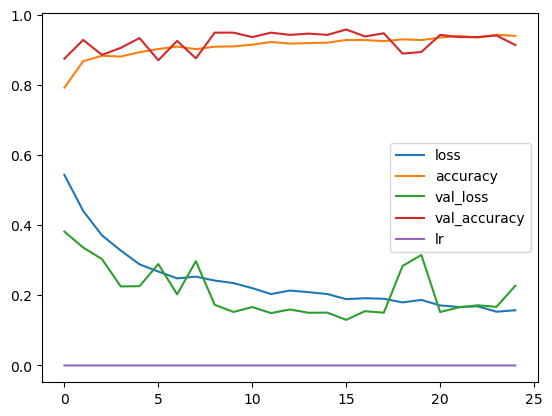

In [46]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [47]:
yp_train = model.predict(x_train)
yp_train = np.argmax(yp_train, axis = 1)

yp_val = model.predict(x_val)
yp_val = np.argmax(yp_val, axis = 1)

yp_test = model.predict(x_test)
yp_test = np.argmax(yp_test, axis = 1)

87/87 [==============================] - 27s 314ms/step


In [48]:
def evaluation_parametrics(name, y_train, yp_train, y_val, yp_val, y_test, yp_test):
    
    print("\n-----------------------------{}-----------------------------\n".format(name))
    
    cm_train = confusion_matrix(y_train, yp_train)
    t1 = ConfusionMatrixDisplay(cm_train)
    s1 = round((cm_train[0,0]/(cm_train[0,0] + cm_train[0,1])),4)
    
    print("Classification Report for Train Data\n")
    print(classification_report(y_train, yp_train)) 
    print("--------------------------------------------------------------------------")
    print("Recall on Train Data: ", round(recall_score(y_train, yp_train),4))
    print("Specificity on Train Data: ", s1)
    print("Accuracy on Train Data: ", round(accuracy_score(y_train, yp_train),4))
    print("Precision on Train Data: ", round(precision_score(y_train, yp_train),4))
    print("F1 Score on Train Data: ", round(f1_score(y_train, yp_train),4))
    print("--------------------------------------------------------------------------")
       
    cm_val = confusion_matrix(y_val, yp_val)
    t2 = ConfusionMatrixDisplay(cm_val)
    s2 = round((cm_val[0,0]/(cm_val[0,0] + cm_val[0,1])),4)
    
    print("\nClassification Report for Validation Data\n")
    print(classification_report(y_val, yp_val))   
    print("--------------------------------------------------------------------------")
    print("Recall on Val Data: ", round(recall_score(y_val, yp_val),4))
    print("Specificity on Val Data: ", s2)
    print("Accuracy on Val Data: ", round(accuracy_score(y_val, yp_val),4))
    print("Precision on Val Data: ", round(precision_score(y_val, yp_val),4))
    print("F1 Score on Val Data: ", round(f1_score(y_val, yp_val),4))
    print("--------------------------------------------------------------------------")

    cm_test = confusion_matrix(y_test, yp_test)
    t3 = ConfusionMatrixDisplay(cm_test)
    s3 = round((cm_test[0,0]/(cm_test[0,0] + cm_test[0,1])),4)
    
    print("\nClassification Report for Test Data\n")
    print(classification_report(y_test, yp_test))   
    print("--------------------------------------------------------------------------")
    print("Recall on Test Data: ", round(recall_score(y_test, yp_test), 4))
    print("Specificity on Test Data: ", s3)
    print("Accuracy on Test Data: ", round(accuracy_score(y_test, yp_test), 4))
    print("Precision on Test Data: ", round(precision_score(y_test, yp_test), 4))
    print("F1 Score Test Data: ", round(f1_score(y_test, yp_test), 4))
    print("--------------------------------------------------------------------------")
    
    t1.plot()
    t2.plot()   
    t3.plot()


-----------------------------Covid-19 VGG16-----------------------------

Classification Report for Train Data

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7287
           1       0.94      0.91      0.92      2654

    accuracy                           0.96      9941
   macro avg       0.96      0.94      0.95      9941
weighted avg       0.96      0.96      0.96      9941

--------------------------------------------------------------------------
Recall on Train Data:  0.905
Specificity on Train Data:  0.9808
Accuracy on Train Data:  0.9606
Precision on Train Data:  0.9449
F1 Score on Train Data:  0.9246
--------------------------------------------------------------------------

Classification Report for Validation Data

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       844
           1       0.93      0.89      0.91       261

    accuracy                           0.

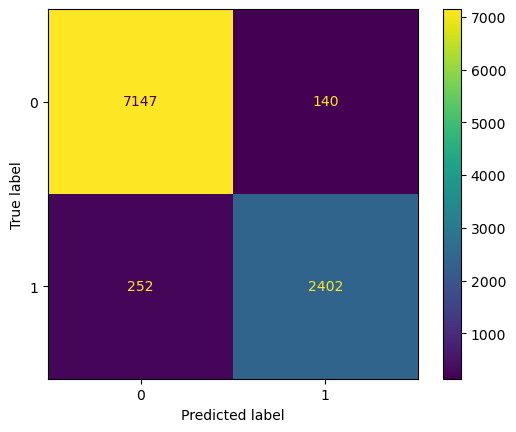

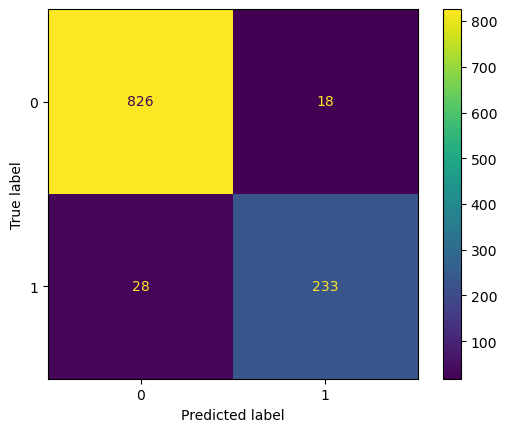

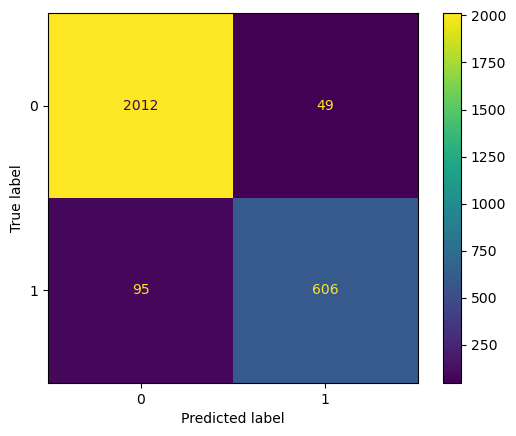

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score

evaluation_parametrics("Covid-19 VGG16", y_train, yp_train, y_val, yp_val, y_test, yp_test)

# ResNet50_V2_DA_Model

In [63]:
from keras.applications.resnet_v2 import ResNet50V2

base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(70, 70, 3))

for layer in base_model.layers:
    layer.trainable = False

In [64]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 70, 70, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 76, 76, 3)            0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 35, 35, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 37, 37, 64)           0         ['conv1_conv[0][0]']          
                                                                                         

 tchNormalization)                                                                                
                                                                                                  
 conv2_block3_preact_relu (  (None, 18, 18, 256)          0         ['conv2_block3_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 18, 18, 64)           16384     ['conv2_block3_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 18, 18, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv3_block2_1_relu (Activ  (None, 9, 9, 128)            0         ['conv3_block2_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_2_pad (ZeroPa  (None, 11, 11, 128)          0         ['conv3_block2_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv3_block2_2_conv (Conv2  (None, 9, 9, 128)            147456    ['conv3_block2_2_pad[0][0]']  
 D)                                                                                               
                                                                                                  
 conv3_block2_2_bn (BatchNo  (None, 9, 9, 128)            512       ['conv3_block2_2_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv3_block4_3_conv (Conv2  (None, 5, 5, 512)            66048     ['conv3_block4_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block4_out (Add)      (None, 5, 5, 512)            0         ['max_pooling2d_4[0][0]',     
                                                                     'conv3_block4_3_conv[0][0]'] 
                                                                                                  
 conv4_block1_preact_bn (Ba  (None, 5, 5, 512)            2048      ['conv3_block4_out[0][0]']    
 tchNormalization)                                                                                
                                                                                                  
 conv4_blo

 D)                                                                 0]']                          
                                                                                                  
 conv4_block3_1_bn (BatchNo  (None, 5, 5, 256)            1024      ['conv4_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block3_1_relu (Activ  (None, 5, 5, 256)            0         ['conv4_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block3_2_pad (ZeroPa  (None, 7, 7, 256)            0         ['conv4_block3_1_relu[0][0]'] 
 dding2D)                                                                                         
          

 conv4_block5_2_relu (Activ  (None, 5, 5, 256)            0         ['conv4_block5_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block5_3_conv (Conv2  (None, 5, 5, 1024)           263168    ['conv4_block5_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block5_out (Add)      (None, 5, 5, 1024)           0         ['conv4_block4_out[0][0]',    
                                                                     'conv4_block5_3_conv[0][0]'] 
                                                                                                  
 conv4_block6_preact_bn (Ba  (None, 5, 5, 1024)           4096      ['conv4_block5_out[0][0]']    
 tchNormal

                                                                                                  
 conv5_block2_preact_relu (  (None, 3, 3, 2048)           0         ['conv5_block2_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv5_block2_1_conv (Conv2  (None, 3, 3, 512)            1048576   ['conv5_block2_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv5_block2_1_bn (BatchNo  (None, 3, 3, 512)            2048      ['conv5_block2_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_blo

In [71]:

train_from_layer = base_model.get_layer('conv5_block1_1_conv')  
for layer in base_model.layers:
    if layer == train_from_layer:
        layer.trainable = True
    else:
        layer.trainable = False

In [72]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.regularizers import l2

weight_decay = 0.0001
model = tf.keras.Sequential([
    base_model, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(weight_decay)),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(2, activation='softmax')
])

In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 3, 3, 2048)        23564800  
                                                                 
 global_average_pooling2d_5  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 8)                 16392     
                                                                 
 batch_normalization_4 (Bat  (None, 8)                 32        
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 8)                

In [74]:

batch_size = 32

epochs = 200

optimizer = Adam(learning_rate=0.0003)

model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=0.000001)

early_stopping = EarlyStopping(monitor='val_loss', patience=9, restore_best_weights=True)

RS50 = model.fit(augmented_train_data,
          epochs=epochs,
          validation_data=(x_val, y_val),
          callbacks=[reduce_lr, early_stopping])

Epoch 1/200
311/311 [==============================] - 152s 479ms/step - loss: 0.5632 - accuracy: 0.7574 - val_loss: 0.3039 - val_accuracy: 0.8869 - lr: 3.0000e-04
Epoch 2/200
311/311 [==============================] - 147s 472ms/step - loss: 0.3763 - accuracy: 0.8599 - val_loss: 0.2818 - val_accuracy: 0.8905 - lr: 3.0000e-04
Epoch 3/200
311/311 [==============================] - 149s 479ms/step - loss: 0.3187 - accuracy: 0.8787 - val_loss: 0.2743 - val_accuracy: 0.8842 - lr: 3.0000e-04
Epoch 4/200
311/311 [==============================] - 149s 478ms/step - loss: 0.2999 - accuracy: 0.8858 - val_loss: 0.2294 - val_accuracy: 0.9176 - lr: 3.0000e-04
Epoch 5/200
311/311 [==============================] - 148s 477ms/step - loss: 0.2808 - accuracy: 0.8932 - val_loss: 0.4158 - val_accuracy: 0.8398 - lr: 3.0000e-04
Epoch 6/200
311/311 [==============================] - 148s 475ms/step - loss: 0.2667 - accuracy: 0.8963 - val_loss: 0.1973 - val_accuracy: 0.9276 - lr: 3.0000e-04
Epoch 7/200
311/

<Axes: >

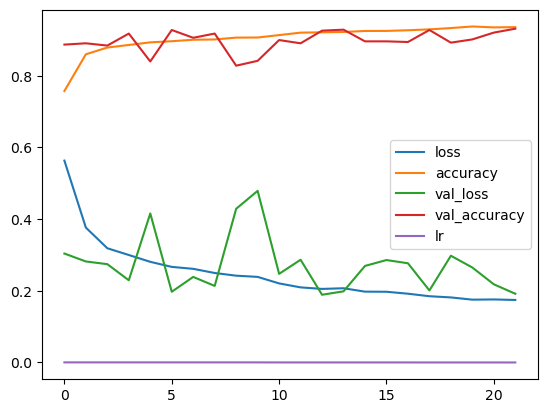

In [75]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [76]:
yp_train = model.predict(x_train)
yp_train = np.argmax(yp_train, axis = 1)

yp_val = model.predict(x_val)
yp_val = np.argmax(yp_val, axis = 1)

yp_test = model.predict(x_test)
yp_test = np.argmax(yp_test, axis = 1)

87/87 [==============================] - 16s 183ms/step


In [77]:
def evaluation_parametrics(name, y_train, yp_train, y_val, yp_val, y_test, yp_test):
    
    print("\n-----------------------------{}-----------------------------\n".format(name))
    
    cm_train = confusion_matrix(y_train, yp_train)
    t1 = ConfusionMatrixDisplay(cm_train)
    s1 = round((cm_train[0,0]/(cm_train[0,0] + cm_train[0,1])),4)
    
    print("Classification Report for Train Data\n")
    print(classification_report(y_train, yp_train)) 
    print("--------------------------------------------------------------------------")
    print("Recall on Train Data: ", round(recall_score(y_train, yp_train),4))
    print("Specificity on Train Data: ", s1)
    print("Accuracy on Train Data: ", round(accuracy_score(y_train, yp_train),4))
    print("Precision on Train Data: ", round(precision_score(y_train, yp_train),4))
    print("F1 Score on Train Data: ", round(f1_score(y_train, yp_train),4))
    print("--------------------------------------------------------------------------")
       
    cm_val = confusion_matrix(y_val, yp_val)
    t2 = ConfusionMatrixDisplay(cm_val)
    s2 = round((cm_val[0,0]/(cm_val[0,0] + cm_val[0,1])),4)
    
    print("\nClassification Report for Validation Data\n")
    print(classification_report(y_val, yp_val))   
    print("--------------------------------------------------------------------------")
    print("Recall on Val Data: ", round(recall_score(y_val, yp_val),4))
    print("Specificity on Val Data: ", s2)
    print("Accuracy on Val Data: ", round(accuracy_score(y_val, yp_val),4))
    print("Precision on Val Data: ", round(precision_score(y_val, yp_val),4))
    print("F1 Score on Val Data: ", round(f1_score(y_val, yp_val),4))
    print("--------------------------------------------------------------------------")

    cm_test = confusion_matrix(y_test, yp_test)
    t3 = ConfusionMatrixDisplay(cm_test)
    s3 = round((cm_test[0,0]/(cm_test[0,0] + cm_test[0,1])),4)
    
    print("\nClassification Report for Test Data\n")
    print(classification_report(y_test, yp_test))   
    print("--------------------------------------------------------------------------")
    print("Recall on Test Data: ", round(recall_score(y_test, yp_test), 4))
    print("Specificity on Test Data: ", s3)
    print("Accuracy on Test Data: ", round(accuracy_score(y_test, yp_test), 4))
    print("Precision on Test Data: ", round(precision_score(y_test, yp_test), 4))
    print("F1 Score Test Data: ", round(f1_score(y_test, yp_test), 4))
    print("--------------------------------------------------------------------------")
    
    t1.plot()
    t2.plot()   
    t3.plot()


-----------------------------Covid-19 ResNet50 V2-----------------------------

Classification Report for Train Data

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7287
           1       0.98      0.76      0.85      2654

    accuracy                           0.93      9941
   macro avg       0.95      0.88      0.90      9941
weighted avg       0.93      0.93      0.93      9941

--------------------------------------------------------------------------
Recall on Train Data:  0.76
Specificity on Train Data:  0.9931
Accuracy on Train Data:  0.9309
Precision on Train Data:  0.9758
F1 Score on Train Data:  0.8545
--------------------------------------------------------------------------

Classification Report for Validation Data

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       844
           1       0.97      0.70      0.82       261

    accuracy                        

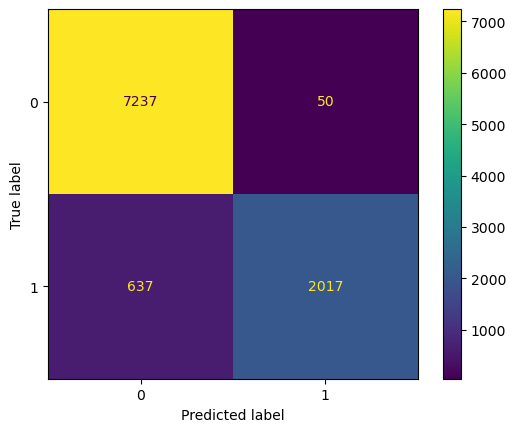

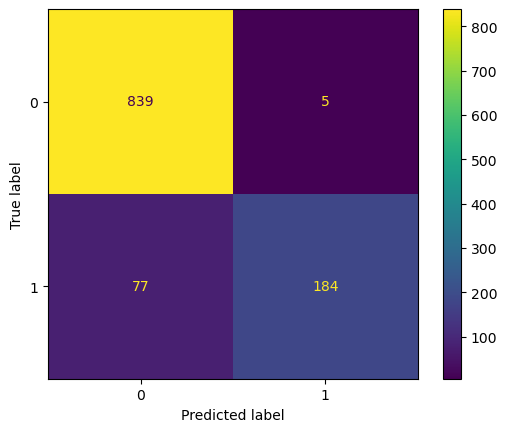

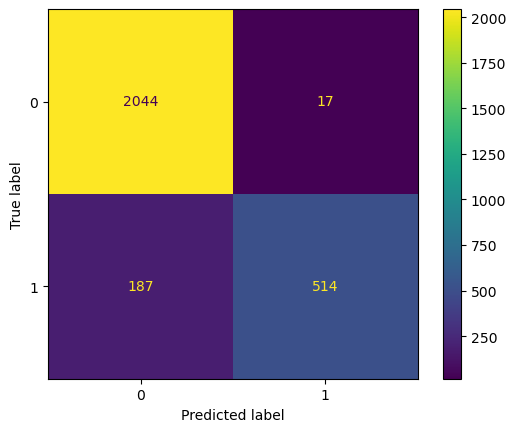

In [78]:
evaluation_parametrics("Covid-19 ResNet50 V2", y_train, yp_train, y_val, yp_val, y_test, yp_test)

#  Deep Convolutional Generative Adversarial Network (DCGAN)

In [6]:
import cv2
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow.keras import layers, models
all_data = []

for i in range(len(data)):
    image = cv2.imread(data['path'][i])
    image = cv2.resize(image, (128, 128))

    image = image / 255.0

    image = 2 * image - 1.0

    label = 1 if data['corona_result'][i] == "Positive" else 0
    all_data.append([image, label])


x = np.array([item[0] for item in all_data])
y = np.array([item[1] for item in all_data])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [7]:
print(x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape)

(9941, 128, 128, 3) (2762, 128, 128, 3) (1105, 128, 128, 3) (9941,) (2762,) (1105,)


In [8]:
x_train.max()

1.0

In [9]:
x_train.min()

-1.0

In [10]:
only_positves = x_train[y_train==1]

In [11]:
only_positves.shape

(2654, 128, 128, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


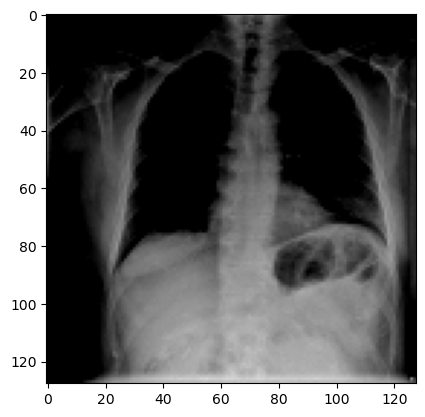

In [88]:
plt.imshow(only_positves[1000])

In [7]:
import numpy as np
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Conv2DTranspose, Conv2D, LeakyReLU, Dropout, Flatten
from tensorflow.keras.models import Sequential


codings_size = 100  

generator = Sequential()


generator.add(Dense(128 * 8 * 8 , input_shape=[codings_size]))
generator.add(LeakyReLU(0.2))
generator.add(Reshape([8, 8, 128]))


generator.add(BatchNormalization())


generator.add(Conv2DTranspose(64, (4,4), strides=(2,2), padding='same', activation="relu"))
generator.add(LeakyReLU(0.2))

generator.add(BatchNormalization())


generator.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same', activation="relu"))
generator.add(LeakyReLU(0.2))

generator.add(BatchNormalization())

generator.add(Conv2DTranspose(64, (4,4), strides=(2,2), padding='same', activation="relu"))
generator.add(LeakyReLU(0.2))

generator.add(BatchNormalization())

generator.add(Conv2DTranspose(3, (5,5), strides=2, padding="same", activation="tanh"))


In [111]:
from keras import optimizers 
discriminator = Sequential()


discriminator.add(Conv2D(128, (5,5), strides=(2,2), padding="same", input_shape=[128, 128, 3]))
discriminator.add(LeakyReLU(0.3))
discriminator.add(Dropout(0.2))


discriminator.add(Conv2D(64, (5,5), strides=(2,2), padding="same"))
discriminator.add(LeakyReLU(0.3))
discriminator.add(Dropout(0.2))

discriminator.add(Conv2D(128, (5,5), strides=(2,2), padding="same"))
discriminator.add(LeakyReLU(0.3))
discriminator.add(Dropout(0.2))

discriminator.add(Conv2D(128, (5,5), strides=(2,2), padding="same"))
discriminator.add(LeakyReLU(0.3))
discriminator.add(Dropout(0.2))

discriminator.add(Conv2D(64, (5,5), strides=(2,2), padding="same"))
discriminator.add(LeakyReLU(0.3))
discriminator.add(Dropout(0.2))

discriminator.add(Flatten())

discriminator.add(Dense(1, activation="sigmoid"))
opt = optimizers.Adam(learning_rate=0.0001, beta_1=0.5) 

In [112]:
generator.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8192)              827392    
                                                                 
 leaky_re_lu_68 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_7 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 batch_normalization_28 (Ba  (None, 8, 8, 128)         512       
 tchNormalization)                                               
                                                                 
 conv2d_transpose_28 (Conv2  (None, 16, 16, 64)        131136    
 DTranspose)                                                     
                                                                 
 leaky_re_lu_69 (LeakyReLU)  (None, 16, 16, 64)      

In [113]:
discriminator.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 64, 64, 128)       9728      
                                                                 
 leaky_re_lu_72 (LeakyReLU)  (None, 64, 64, 128)       0         
                                                                 
 dropout_40 (Dropout)        (None, 64, 64, 128)       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 64)        204864    
                                                                 
 leaky_re_lu_73 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 dropout_41 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 16, 128)     

In [114]:
GAN = Sequential([generator, discriminator])

In [115]:
discriminator.compile(loss="binary_crossentropy", optimizer= opt ,metrics=['accuracy'])
discriminator.trainable = False

In [116]:
GAN.compile(loss="binary_crossentropy", optimizer= "adam")

In [117]:
GAN.layers

In [118]:
GAN.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_23 (Sequential)  (None, 128, 128, 3)       1227203   
                                                                 
 sequential_24 (Sequential)  (None, 1)                 1035137   
                                                                 
Total params: 2262340 (8.63 MB)
Trainable params: 1226435 (4.68 MB)
Non-trainable params: 1035905 (3.95 MB)
_________________________________________________________________


In [119]:
batch_size = 128

In [120]:
my_data = only_positves

In [121]:
dataset = tf.data.Dataset.from_tensor_slices(my_data)

In [122]:
type(dataset)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [123]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [124]:
epochs = 250

In [125]:
generator, discriminator = GAN.layers

# For every epcoh
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
  
    for X_batch in dataset:
        i=i+1
        if i%20 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
      
      
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
   
        gen_images = generator(noise)
        
  
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)
        
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        
        
        discriminator.trainable = True
        
       
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
       
        noise = tf.random.normal(shape=[batch_size, codings_size])
       
        y2 = tf.constant([[1.]] * batch_size)
        
        
        discriminator.trainable = False
        
        GAN.train_on_batch(noise, y2)
        
print("TRAINING COMPLETE")       

Currently on Epoch 1
	Currently on batch number 20 of 20
Currently on Epoch 2
	Currently on batch number 20 of 20
Currently on Epoch 3
	Currently on batch number 20 of 20
Currently on Epoch 4
	Currently on batch number 20 of 20
Currently on Epoch 5
	Currently on batch number 20 of 20
Currently on Epoch 6
	Currently on batch number 20 of 20
Currently on Epoch 7
	Currently on batch number 20 of 20
Currently on Epoch 8
	Currently on batch number 20 of 20
Currently on Epoch 9
	Currently on batch number 20 of 20
Currently on Epoch 10
	Currently on batch number 20 of 20
Currently on Epoch 11
	Currently on batch number 20 of 20
Currently on Epoch 12
	Currently on batch number 20 of 20
Currently on Epoch 13
	Currently on batch number 20 of 20
Currently on Epoch 14
	Currently on batch number 20 of 20
Currently on Epoch 15
	Currently on batch number 20 of 20
Currently on Epoch 16
	Currently on batch number 20 of 20
Currently on Epoch 17
	Currently on batch number 20 of 20
Currently on Epoch 18
	

Currently on Epoch 142
	Currently on batch number 20 of 20
Currently on Epoch 143
	Currently on batch number 20 of 20
Currently on Epoch 144
	Currently on batch number 20 of 20
Currently on Epoch 145
	Currently on batch number 20 of 20
Currently on Epoch 146
	Currently on batch number 20 of 20
Currently on Epoch 147
	Currently on batch number 20 of 20
Currently on Epoch 148
	Currently on batch number 20 of 20
Currently on Epoch 149
	Currently on batch number 20 of 20
Currently on Epoch 150
	Currently on batch number 20 of 20
Currently on Epoch 151
	Currently on batch number 20 of 20
Currently on Epoch 152
	Currently on batch number 20 of 20
Currently on Epoch 153
	Currently on batch number 20 of 20
Currently on Epoch 154
	Currently on batch number 20 of 20
Currently on Epoch 155
	Currently on batch number 20 of 20
Currently on Epoch 156
	Currently on batch number 20 of 20
Currently on Epoch 157
	Currently on batch number 20 of 20
Currently on Epoch 158
	Currently on batch number 20 of 

In [126]:
generator.save('generator_Covid-19_model.keras')

In [137]:
noise = tf.random.normal(shape=[1400,codings_size])

In [244]:
noise.shape

TensorShape([1400, 100])

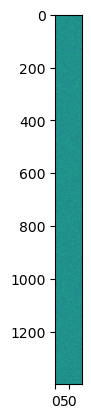

In [245]:
plt.imshow(noise)

In [246]:
images = generator(noise)

In [247]:
discriminator_loss_function = tf.keras.losses.BinaryCrossentropy()
generator_loss_function = tf.keras.losses.BinaryCrossentropy()


In [248]:
discriminator_predictions = discriminator(images)


In [249]:
batch_size = 32 
X_fake_vs_real = tf.concat([images[:batch_size], x_train[:batch_size]], axis=0)
y_fake = tf.zeros((batch_size, 1))
y_real = tf.ones((batch_size, 1))
y = tf.concat([y_fake, y_real], axis=0)

discriminator_loss = discriminator_loss_function(y, discriminator(X_fake_vs_real))
generator_loss = generator_loss_function(y_real, discriminator(images[:batch_size]))


print(f"Discriminator Loss on Training Data: {discriminator_loss}")
print(f"Generator Loss on Training Data: {generator_loss}")

Discriminator Loss on Training Data: 0.1869361698627472
Generator Loss on Training Data: 2.346088409423828


In [241]:
single_image = images[99]

In [242]:
single_image.shape

TensorShape([128, 128, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


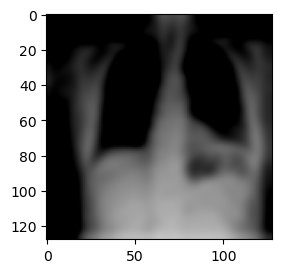

In [243]:
plt.imshow(single_image)

In [9]:
import os

save_folder = "C:\\Users\\Admin\\Downloads\\gans\\positive"
os.makedirs(save_folder, exist_ok=True)

for i in range(1400):
    noise = tf.random.normal(shape=[1, codings_size])
    generated_image = generator(noise)[0].numpy()
    
    generated_image = (generated_image + 1) / 2.0
    
    filename = os.path.join(save_folder, f"generated_image_{i}.png")
    plt.imsave(filename, generated_image)


In [10]:
files = ['normal', 'positive']
path = "C://Users/Admin/Downloads/gans"

data_dir = os.path.join(path)

data = []
for id, level in enumerate(files):
    for file in os.listdir(os.path.join(data_dir, level+'/'+'images')):

        data.append([level +'/' +'images'+ '/'+file, level])
        

data = pd.DataFrame(data, columns = ['image_file', 'corona_result'])

data['path'] = path + '/' +data['image_file']
data['corona_result'] = data['corona_result'].map({'normal': 'Negative', 'positive': 'Positive'})

data.head()

,image_file,corona_result,path
0,normal/images/Normal-1.png,Negative,C://Users/Admin/Downloads/gans/normal/images/N...
1,normal/images/Normal-10.png,Negative,C://Users/Admin/Downloads/gans/normal/images/N...
2,normal/images/Normal-100.png,Negative,C://Users/Admin/Downloads/gans/normal/images/N...
3,normal/images/Normal-1000.png,Negative,C://Users/Admin/Downloads/gans/normal/images/N...
4,normal/images/Normal-1001.png,Negative,C://Users/Admin/Downloads/gans/normal/images/N...


In [11]:
data.tail()

,image_file,corona_result,path
10043,positive/images/generated_image_995.png,Positive,C://Users/Admin/Downloads/gans/positive/images...
10044,positive/images/generated_image_996.png,Positive,C://Users/Admin/Downloads/gans/positive/images...
10045,positive/images/generated_image_997.png,Positive,C://Users/Admin/Downloads/gans/positive/images...
10046,positive/images/generated_image_998.png,Positive,C://Users/Admin/Downloads/gans/positive/images...
10047,positive/images/generated_image_999.png,Positive,C://Users/Admin/Downloads/gans/positive/images...


In [12]:
import matplotlib.cm as cm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame()
df['corona_result'] = ['Positive', 'Negative']
df['Count'] = [len(data[data['corona_result'] == 'Positive']), len(data[data['corona_result'] == 'Negative'])]
df = df.sort_values(by = ['Count'], ascending = False)

fig = px.bar(df, x = 'corona_result', y = 'Count', 
             color = "corona_result", text_auto='', width = 600, 
             color_discrete_sequence = ["orange", "purple"],
             template = 'plotly_dark')

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)

fig.show()

In [13]:
import cv2
all_data = []

for i in range(len(data)):
    image = cv2.imread(data['path'][i])
    image = cv2.resize(image, (70, 70)) / 255.0
    label = 1 if data['corona_result'][i] == "Positive" else 0
    all_data.append([image, label])
    
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow.keras import layers, models
x = []
y = []

for image, label in all_data:
    x.append(image)
    y.append(label)

    
x = np.array(x)
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)


print(x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape)

(7234, 70, 70, 3) (2010, 70, 70, 3) (804, 70, 70, 3) (7234,) (2010,) (804,)


In [14]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )
batch_size = 32
augmented_train_data = datagen.flow(x_train, y_train, batch_size=batch_size)

# VGG16_DCGAN_DA_Model

In [263]:
from keras.applications.vgg16 import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(70, 70, 3))

for layer in base_model.layers:
    layer.trainable = False
train_from_layer = base_model.get_layer('block5_conv1')  
for layer in base_model.layers:
    if layer == train_from_layer:
        layer.trainable = True
    else:
        layer.trainable = False
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.regularizers import l2

weight_decay = 0.0001
model = tf.keras.Sequential([
    base_model, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(weight_decay)),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(2, activation='softmax')
])

In [264]:
batch_size = 32

epochs = 200

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=0.000001)

early_stopping = EarlyStopping(monitor='val_loss', patience=9, restore_best_weights=True)

VGG16 = model.fit(augmented_train_data,
          epochs=epochs,
          validation_data=(x_val, y_val),
          callbacks=[reduce_lr, early_stopping])

Epoch 1/200
227/227 [==============================] - 119s 520ms/step - loss: 0.4323 - accuracy: 0.8142 - val_loss: 0.3412 - val_accuracy: 0.8719 - lr: 1.0000e-04
Epoch 2/200
227/227 [==============================] - 117s 517ms/step - loss: 0.3631 - accuracy: 0.8647 - val_loss: 0.3337 - val_accuracy: 0.8545 - lr: 1.0000e-04
Epoch 3/200
227/227 [==============================] - 118s 519ms/step - loss: 0.3385 - accuracy: 0.8727 - val_loss: 0.2700 - val_accuracy: 0.8943 - lr: 1.0000e-04
Epoch 4/200
227/227 [==============================] - 118s 519ms/step - loss: 0.3131 - accuracy: 0.8860 - val_loss: 0.2631 - val_accuracy: 0.9129 - lr: 1.0000e-04
Epoch 5/200
227/227 [==============================] - 118s 518ms/step - loss: 0.2952 - accuracy: 0.8947 - val_loss: 0.2115 - val_accuracy: 0.9279 - lr: 1.0000e-04
Epoch 6/200
227/227 [==============================] - 118s 518ms/step - loss: 0.2959 - accuracy: 0.8912 - val_loss: 0.2528 - val_accuracy: 0.8930 - lr: 1.0000e-04
Epoch 7/200
227/

63/63 [==============================] - 21s 329ms/step


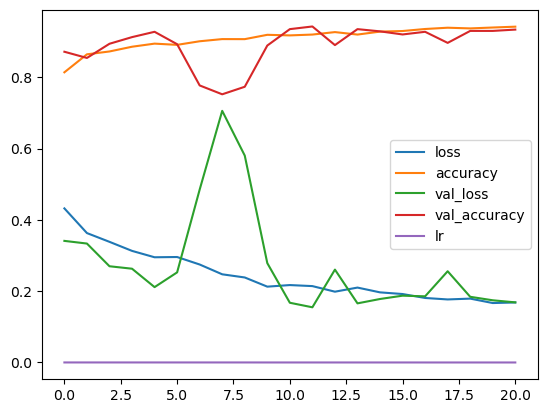

In [265]:
losses = pd.DataFrame(model.history.history)
losses.plot()
yp_train = model.predict(x_train)
yp_train = np.argmax(yp_train, axis = 1)

yp_val = model.predict(x_val)
yp_val = np.argmax(yp_val, axis = 1)

yp_test = model.predict(x_test)
yp_test = np.argmax(yp_test, axis = 1)

In [266]:
def evaluation_parametrics(name, y_train, yp_train, y_val, yp_val, y_test, yp_test):
    
    print("\n-----------------------------{}-----------------------------\n".format(name))
    
    cm_train = confusion_matrix(y_train, yp_train)
    t1 = ConfusionMatrixDisplay(cm_train)
    s1 = round((cm_train[0,0]/(cm_train[0,0] + cm_train[0,1])),4)
    
    print("Classification Report for Train Data\n")
    print(classification_report(y_train, yp_train)) 
    print("--------------------------------------------------------------------------")
    print("Recall on Train Data: ", round(recall_score(y_train, yp_train),4))
    print("Specificity on Train Data: ", s1)
    print("Accuracy on Train Data: ", round(accuracy_score(y_train, yp_train),4))
    print("Precision on Train Data: ", round(precision_score(y_train, yp_train),4))
    print("F1 Score on Train Data: ", round(f1_score(y_train, yp_train),4))
    print("--------------------------------------------------------------------------")
       
    cm_val = confusion_matrix(y_val, yp_val)
    t2 = ConfusionMatrixDisplay(cm_val)
    s2 = round((cm_val[0,0]/(cm_val[0,0] + cm_val[0,1])),4)
    
    print("\nClassification Report for Validation Data\n")
    print(classification_report(y_val, yp_val))   
    print("--------------------------------------------------------------------------")
    print("Recall on Val Data: ", round(recall_score(y_val, yp_val),4))
    print("Specificity on Val Data: ", s2)
    print("Accuracy on Val Data: ", round(accuracy_score(y_val, yp_val),4))
    print("Precision on Val Data: ", round(precision_score(y_val, yp_val),4))
    print("F1 Score on Val Data: ", round(f1_score(y_val, yp_val),4))
    print("--------------------------------------------------------------------------")

    cm_test = confusion_matrix(y_test, yp_test)
    t3 = ConfusionMatrixDisplay(cm_test)
    s3 = round((cm_test[0,0]/(cm_test[0,0] + cm_test[0,1])),4)
    
    print("\nClassification Report for Test Data\n")
    print(classification_report(y_test, yp_test))   
    print("--------------------------------------------------------------------------")
    print("Recall on Test Data: ", round(recall_score(y_test, yp_test), 4))
    print("Specificity on Test Data: ", s3)
    print("Accuracy on Test Data: ", round(accuracy_score(y_test, yp_test), 4))
    print("Precision on Test Data: ", round(precision_score(y_test, yp_test), 4))
    print("F1 Score Test Data: ", round(f1_score(y_test, yp_test), 4))
    print("--------------------------------------------------------------------------")
    
    t1.plot()
    t2.plot()   
    t3.plot()


-----------------------------Covid-19 VGG16-----------------------------

Classification Report for Train Data

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3598
           1       0.96      0.95      0.95      3636

    accuracy                           0.95      7234
   macro avg       0.95      0.95      0.95      7234
weighted avg       0.95      0.95      0.95      7234

--------------------------------------------------------------------------
Recall on Train Data:  0.9458
Specificity on Train Data:  0.9594
Accuracy on Train Data:  0.9526
Precision on Train Data:  0.9593
F1 Score on Train Data:  0.9525
--------------------------------------------------------------------------

Classification Report for Validation Data

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       400
           1       0.95      0.93      0.94       404

    accuracy                           0

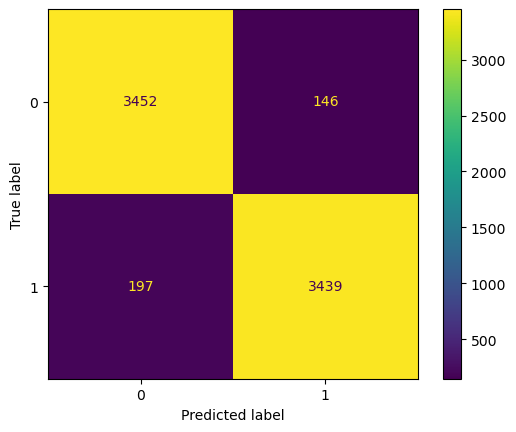

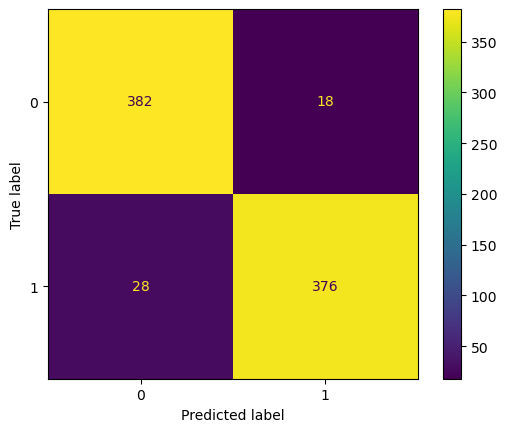

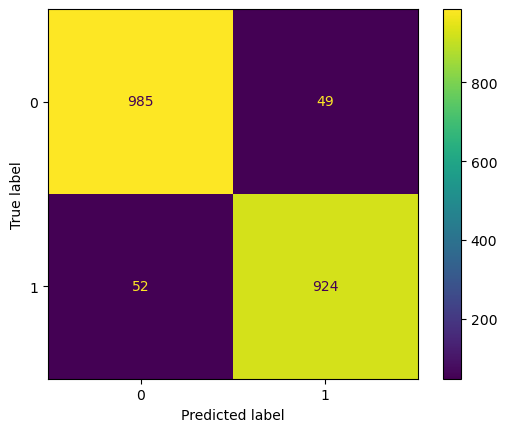

In [267]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score

evaluation_parametrics("Covid-19 VGG16", y_train, yp_train, y_val, yp_val, y_test, yp_test)

# ResNet50_V2_DCGAN_DA_Model

In [22]:
from keras.applications.resnet_v2 import ResNet50V2

base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(70, 70, 3))

for layer in base_model.layers:
    layer.trainable = False
train_from_layer = base_model.get_layer('conv5_block1_1_conv')  
for layer in base_model.layers:
    if layer == train_from_layer:
        layer.trainable = True
    else:
        layer.trainable = False
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.regularizers import l2

weight_decay = 0.0001
model = tf.keras.Sequential([
    base_model, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(weight_decay)),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(2, activation='softmax')
])

In [23]:
batch_size = 32

epochs = 200

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.000001)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

RS50 = model.fit(augmented_train_data,
          epochs=epochs,
          validation_data=(x_val, y_val),
          callbacks=[reduce_lr, early_stopping])

Epoch 1/200
227/227 [==============================] - 122s 519ms/step - loss: 0.6180 - accuracy: 0.7000 - val_loss: 0.4977 - val_accuracy: 0.7786 - lr: 1.0000e-04
Epoch 2/200
227/227 [==============================] - 116s 510ms/step - loss: 0.4361 - accuracy: 0.7939 - val_loss: 0.3487 - val_accuracy: 0.8545 - lr: 1.0000e-04
Epoch 3/200
227/227 [==============================] - 113s 499ms/step - loss: 0.3714 - accuracy: 0.8365 - val_loss: 0.3057 - val_accuracy: 0.8694 - lr: 1.0000e-04
Epoch 4/200
227/227 [==============================] - 126s 557ms/step - loss: 0.3319 - accuracy: 0.8543 - val_loss: 0.2727 - val_accuracy: 0.8806 - lr: 1.0000e-04
Epoch 5/200
227/227 [==============================] - 134s 591ms/step - loss: 0.3130 - accuracy: 0.8681 - val_loss: 0.2924 - val_accuracy: 0.8719 - lr: 1.0000e-04
Epoch 6/200
227/227 [==============================] - 132s 580ms/step - loss: 0.2908 - accuracy: 0.8789 - val_loss: 0.2541 - val_accuracy: 0.8968 - lr: 1.0000e-04
Epoch 7/200
227/

63/63 [==============================] - 12s 193ms/step


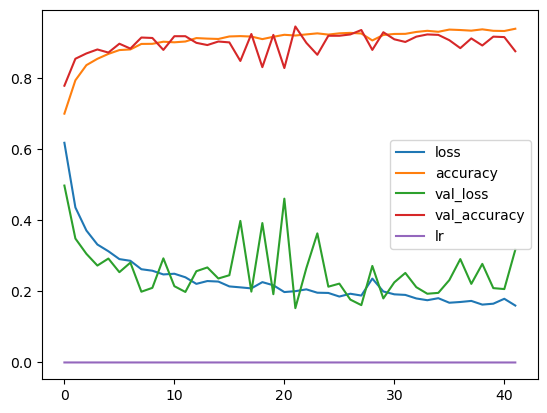

In [24]:
losses = pd.DataFrame(model.history.history)
losses.plot()
yp_train = model.predict(x_train)
yp_train = np.argmax(yp_train, axis = 1)

yp_val = model.predict(x_val)
yp_val = np.argmax(yp_val, axis = 1)

yp_test = model.predict(x_test)
yp_test = np.argmax(yp_test, axis = 1)

In [25]:
def evaluation_parametrics(name, y_train, yp_train, y_val, yp_val, y_test, yp_test):
    
    print("\n-----------------------------{}-----------------------------\n".format(name))
    
    cm_train = confusion_matrix(y_train, yp_train)
    t1 = ConfusionMatrixDisplay(cm_train)
    s1 = round((cm_train[0,0]/(cm_train[0,0] + cm_train[0,1])),4)
    
    print("Classification Report for Train Data\n")
    print(classification_report(y_train, yp_train)) 
    print("--------------------------------------------------------------------------")
    print("Recall on Train Data: ", round(recall_score(y_train, yp_train),4))
    print("Specificity on Train Data: ", s1)
    print("Accuracy on Train Data: ", round(accuracy_score(y_train, yp_train),4))
    print("Precision on Train Data: ", round(precision_score(y_train, yp_train),4))
    print("F1 Score on Train Data: ", round(f1_score(y_train, yp_train),4))
    print("--------------------------------------------------------------------------")
       
    cm_val = confusion_matrix(y_val, yp_val)
    t2 = ConfusionMatrixDisplay(cm_val)
    s2 = round((cm_val[0,0]/(cm_val[0,0] + cm_val[0,1])),4)
    
    print("\nClassification Report for Validation Data\n")
    print(classification_report(y_val, yp_val))   
    print("--------------------------------------------------------------------------")
    print("Recall on Val Data: ", round(recall_score(y_val, yp_val),4))
    print("Specificity on Val Data: ", s2)
    print("Accuracy on Val Data: ", round(accuracy_score(y_val, yp_val),4))
    print("Precision on Val Data: ", round(precision_score(y_val, yp_val),4))
    print("F1 Score on Val Data: ", round(f1_score(y_val, yp_val),4))
    print("--------------------------------------------------------------------------")

    cm_test = confusion_matrix(y_test, yp_test)
    t3 = ConfusionMatrixDisplay(cm_test)
    s3 = round((cm_test[0,0]/(cm_test[0,0] + cm_test[0,1])),4)
    
    print("\nClassification Report for Test Data\n")
    print(classification_report(y_test, yp_test))   
    print("--------------------------------------------------------------------------")
    print("Recall on Test Data: ", round(recall_score(y_test, yp_test), 4))
    print("Specificity on Test Data: ", s3)
    print("Accuracy on Test Data: ", round(accuracy_score(y_test, yp_test), 4))
    print("Precision on Test Data: ", round(precision_score(y_test, yp_test), 4))
    print("F1 Score Test Data: ", round(f1_score(y_test, yp_test), 4))
    print("--------------------------------------------------------------------------")
    
    t1.plot()
    t2.plot()   
    t3.plot()


-----------------------------Covid-19 VGG16-----------------------------

Classification Report for Train Data

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3598
           1       0.97      0.93      0.95      3636

    accuracy                           0.95      7234
   macro avg       0.95      0.95      0.95      7234
weighted avg       0.95      0.95      0.95      7234

--------------------------------------------------------------------------
Recall on Train Data:  0.9271
Specificity on Train Data:  0.9717
Accuracy on Train Data:  0.9493
Precision on Train Data:  0.9706
F1 Score on Train Data:  0.9484
--------------------------------------------------------------------------

Classification Report for Validation Data

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       400
           1       0.97      0.92      0.94       404

    accuracy                           0

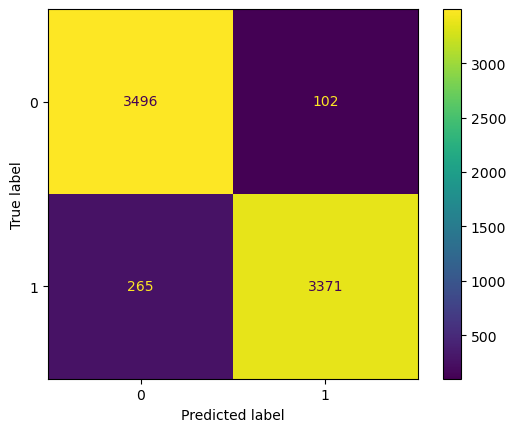

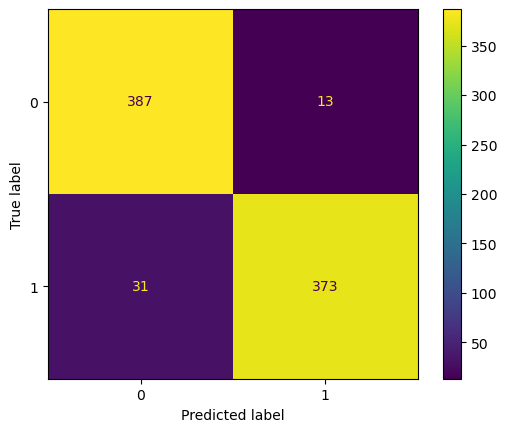

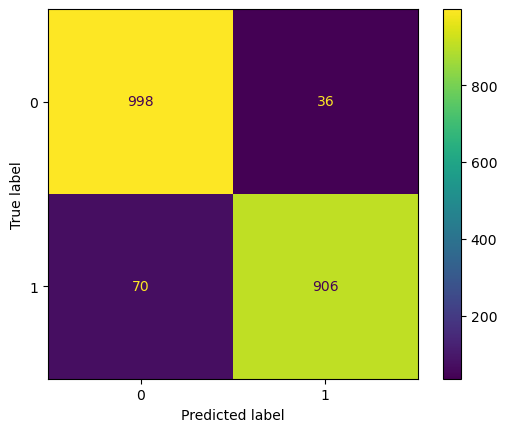

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score

evaluation_parametrics("Covid-19 VGG16", y_train, yp_train, y_val, yp_val, y_test, yp_test)

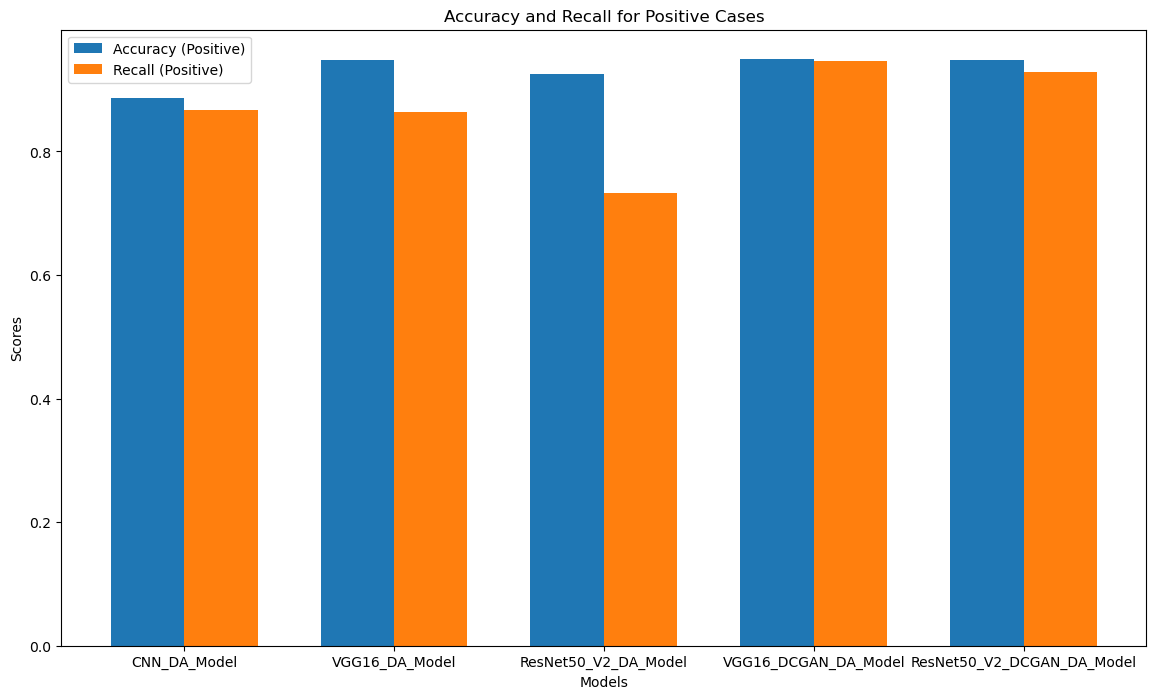

In [52]:
import matplotlib.pyplot as plt


models = ['CNN_DA_Model', 'VGG16_DA_Model', 'ResNet50_V2_DA_Model', 'VGG16_DCGAN_DA_Model', 'ResNet50_V2_DCGAN_DA_Model']
accuracy_positive = [0.886, 0.9479, 0.9261, 0.9498, 0.9473]
recall_positive = [0.8673, 0.8645, 0.7332, 0.9467, 0.9283]
fig, ax = plt.subplots(figsize=(14, 8))  
bar_width = 0.35
index = range(len(models))

bar1 = ax.bar(index, accuracy_positive, bar_width, label='Accuracy (Positive)')
bar2 = ax.bar([i + bar_width for i in index], recall_positive, bar_width, label='Recall (Positive)')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Recall for Positive Cases')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.show()
